In [1]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  
f=open(r"C:\\Users\\Reyhan_System\\Desktop\\khayyam.txt", "r")
f.seek(0)
doc=f.read()
doc

'\n\nبتا دل\nحل جمال مشکل\nکوزه شراب بهم نوش\nکوزه گل\nعهده\nحالي دل سودا\nنوش ماهتاب ماه ماه\nبتابد نيابد\nقرآن مهين کلام خوانند\nدوام خوانند\nپياله آيتي مقيم\nکاندر خوانند\nنخوري طعنه مزن مستانرا\nبنياد حيله دستانرا\nغره مشو مينخوري\nلقمه غلام\nرنگ بوي زيباست\nلاله رخ سرو\nمعلوم طربخانه خاک\nنقاش ازل آراست\nماييم مطرب کنج خراب\nجان دل جام جامه درد شراب\nفارغ اميد رحمت بيم عذاب\nآزاد خاک آتش آب\nقصر جمشيد جام\nآهو بچه روبه\nبهرام گور عمر\nديدي گور بهرام\nابر سبزه گريست\nباده گلرنگ زيست\nسبزه تماشاگه\nسبزه خاک تماشاگه کيست\nگل سعادتت پربار\nدست جام بيکار\nخور زمانه دشمني غدار\nدريافتن دشوار\nدسترس\nانديشه فردات سودا\nضايع دلت شيدا\nباقي عمر بها\nعالم روحاني تفت\nحيران\nنوش نداني\nنداني\nچرخ فلک خرابي کينه تست\nبيدادگري شيوه ديرينه تست\nخاک سينه بشکافند\nگوهر قيمتي سينه تست\nدل زمانه غمناکت\nناگه برود تن روان پاکت\nسبزه نشين بزي روزي\nسبزه بردمد خاکت\nبحر نهفت\nگوهر تحقيق بسفت\nسخني سودا\nداند\nکوزه عاشق زاري\nبند زلف نگاري\nگردن بيني\nدستي برگردن ياري\nکوزه آبخواره مزدوريست\nشاهيست دل 

In [2]:
special_characters=["\n"]
for sc in special_characters:
    doc=doc.replace(sc," . ")
print(doc)

 .  . بتا دل . حل جمال مشکل . کوزه شراب بهم نوش . کوزه گل . عهده . حالي دل سودا . نوش ماهتاب ماه ماه . بتابد نيابد . قرآن مهين کلام خوانند . دوام خوانند . پياله آيتي مقيم . کاندر خوانند . نخوري طعنه مزن مستانرا . بنياد حيله دستانرا . غره مشو مينخوري . لقمه غلام . رنگ بوي زيباست . لاله رخ سرو . معلوم طربخانه خاک . نقاش ازل آراست . ماييم مطرب کنج خراب . جان دل جام جامه درد شراب . فارغ اميد رحمت بيم عذاب . آزاد خاک آتش آب . قصر جمشيد جام . آهو بچه روبه . بهرام گور عمر . ديدي گور بهرام . ابر سبزه گريست . باده گلرنگ زيست . سبزه تماشاگه . سبزه خاک تماشاگه کيست . گل سعادتت پربار . دست جام بيکار . خور زمانه دشمني غدار . دريافتن دشوار . دسترس . انديشه فردات سودا . ضايع دلت شيدا . باقي عمر بها . عالم روحاني تفت . حيران . نوش نداني . نداني . چرخ فلک خرابي کينه تست . بيدادگري شيوه ديرينه تست . خاک سينه بشکافند . گوهر قيمتي سينه تست . دل زمانه غمناکت . ناگه برود تن روان پاکت . سبزه نشين بزي روزي . سبزه بردمد خاکت . بحر نهفت . گوهر تحقيق بسفت . سخني سودا . داند . کوزه عاشق زاري . بند زلف نگاري . گرد

In [3]:
special_characters=["?",'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','1','2','3','4','5','6','7','8','9','0',':']
for sc in special_characters:
    doc=doc.replace(sc,"")
print(doc)

 .  . بتا دل . حل جمال مشکل . کوزه شراب بهم نوش . کوزه گل . عهده . حالي دل سودا . نوش ماهتاب ماه ماه . بتابد نيابد . قرآن مهين کلام خوانند . دوام خوانند . پياله آيتي مقيم . کاندر خوانند . نخوري طعنه مزن مستانرا . بنياد حيله دستانرا . غره مشو مينخوري . لقمه غلام . رنگ بوي زيباست . لاله رخ سرو . معلوم طربخانه خاک . نقاش ازل آراست . ماييم مطرب کنج خراب . جان دل جام جامه درد شراب . فارغ اميد رحمت بيم عذاب . آزاد خاک آتش آب . قصر جمشيد جام . آهو بچه روبه . بهرام گور عمر . ديدي گور بهرام . ابر سبزه گريست . باده گلرنگ زيست . سبزه تماشاگه . سبزه خاک تماشاگه کيست . گل سعادتت پربار . دست جام بيکار . خور زمانه دشمني غدار . دريافتن دشوار . دسترس . انديشه فردات سودا . ضايع دلت شيدا . باقي عمر بها . عالم روحاني تفت . حيران . نوش نداني . نداني . چرخ فلک خرابي کينه تست . بيدادگري شيوه ديرينه تست . خاک سينه بشکافند . گوهر قيمتي سينه تست . دل زمانه غمناکت . ناگه برود تن روان پاکت . سبزه نشين بزي روزي . سبزه بردمد خاکت . بحر نهفت . گوهر تحقيق بسفت . سخني سودا . داند . کوزه عاشق زاري . بند زلف نگاري . گرد

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Reyhan_System\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
a_list = nltk.tokenize.sent_tokenize(doc)
print(a_list)

[' .', '.', 'بتا دل .', 'حل جمال مشکل .', 'کوزه شراب بهم نوش .', 'کوزه گل .', 'عهده .', 'حالي دل سودا .', 'نوش ماهتاب ماه ماه .', 'بتابد نيابد .', 'قرآن مهين کلام خوانند .', 'دوام خوانند .', 'پياله آيتي مقيم .', 'کاندر خوانند .', 'نخوري طعنه مزن مستانرا .', 'بنياد حيله دستانرا .', 'غره مشو مينخوري .', 'لقمه غلام .', 'رنگ بوي زيباست .', 'لاله رخ سرو .', 'معلوم طربخانه خاک .', 'نقاش ازل آراست .', 'ماييم مطرب کنج خراب .', 'جان دل جام جامه درد شراب .', 'فارغ اميد رحمت بيم عذاب .', 'آزاد خاک آتش آب .', 'قصر جمشيد جام .', 'آهو بچه روبه .', 'بهرام گور عمر .', 'ديدي گور بهرام .', 'ابر سبزه گريست .', 'باده گلرنگ زيست .', 'سبزه تماشاگه .', 'سبزه خاک تماشاگه کيست .', 'گل سعادتت پربار .', 'دست جام بيکار .', 'خور زمانه دشمني غدار .', 'دريافتن دشوار .', 'دسترس .', 'انديشه فردات سودا .', 'ضايع دلت شيدا .', 'باقي عمر بها .', 'عالم روحاني تفت .', 'حيران .', 'نوش نداني .', 'نداني .', 'چرخ فلک خرابي کينه تست .', 'بيدادگري شيوه ديرينه تست .', 'خاک سينه بشکافند .', 'گوهر قيمتي سينه تست .', 'دل زمانه غمناکت

In [6]:
len(a_list)

1288

In [7]:
df=pd.DataFrame(a_list, columns=['text'])
df

,text
0,.
1,.
2,بتا دل .
3,حل جمال مشکل .
4,کوزه شراب بهم نوش .
...,...
1283,فردوس دمي وقت آسوده .
1284,عمرت پرستي .
1285,نيستي .
1286,خور عمر غم .


In [9]:
from wordcloud_fa import WordCloudFa
import numpy as np
from PIL import Image

wodcloud = WordCloudFa(persian_normalize=True, include_numbers=False, collocations=False, width=1200, height=800)
stop_words =wodcloud.add_stop_words(['.'])
wc = wodcloud.generate(doc)
image = wc.to_image()
image.show()
image.save('khayyam word cloud.png')

In [20]:
#If you want to give your cloud a mask:

from wordcloud_fa import WordCloudFa
import numpy as np
from PIL import Image
mask= np.array(Image.open("C:\\Users\\Reyhan_System\\Desktop\\mask.png"))

# Passing `no_reshape` parameter for you may cause problem in showing Farsi texts. If your output from the example
# is not true, you can remove that parameter
wodcloud = WordCloudFa(persian_normalize=True, include_numbers=False, background_color="black", mask=mask)

stop_words =wodcloud.add_stop_words(['.'])
wc = wodcloud.generate(doc)
image = wc.to_image()
image.show()
image.save('shahname word cloud_masked.png')

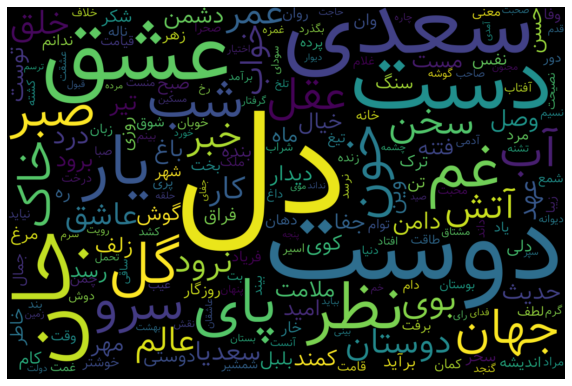

In [9]:
#If you want to show your cloud as a plot
from wordcloud_fa import WordCloudFa
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

wodcloud = WordCloudFa(persian_normalize=True, include_numbers=False, collocations=False, width=1200, height=800)#you can change the dimensions(width=1200, height=800)
stop_words =wodcloud.add_stop_words(['.'])#here you can add other stop words 
wc = wodcloud.generate(doc)
plt.figure(figsize=(10, 7)) 
plt.imshow(wc, interpolation="bilinear") 
plt.axis('off') 
plt.show()